# Milestone 2

*Ammar Riyadh (28222354)*

In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt

## Original Dataset 

The DataFrame below includes information about possible asteriod impacts on earth and asteriod parameters. The dataset includes:
- Columns named "Period Start and "Period End" show the initiation and ending of the risk factor.
- Possible Impacts refers to a percentage of probability for impact
- Asteriod Magnitude refers to the visual brightness relative to the earth , the higher the magnitude the less brightness and visibility.
- Palermo Scale utilizes an in depth scale to quanitfy level of concern for future potential impacts.
- Torino Scale indicates the impact's severity dedicated to notify the public.

In [7]:
df = pd.read_csv ('impacts.csv')
df.head()

,Object Name,Period Start,Period End,Possible Impacts,Cumulative Impact Probability,Asteroid Velocity,Asteroid Magnitude,Asteroid Diameter (km),Cumulative Palermo Scale,Maximum Palermo Scale,Maximum Torino Scale
0,2006 WP1,2017,2017,1,5.200000e-09,17.77,28.3,0.007,-8.31,-8.31,0
1,2013 YB,2017,2046,23,7.600000e-05,8.98,31.4,0.002,-6.60,-6.96,0
2,2008 US,2017,2062,30,1.600000e-05,18.33,31.4,0.002,-6.48,-6.87,0
3,2010 VR139,2017,2076,24,2.000000e-07,4.99,26.7,0.016,-6.83,-6.95,0
4,2015 ME131,2017,2096,85,2.300000e-08,19.46,19.2,0.497,-3.85,-4.30,0


## Task 1: Analysis Pipline 
- Through this method chaining I was able to get rid of all null values, assign units to parameters  , and organize the data. I have renamed the colums for further description. I have also dropped the maximum torino scale because most of the values were 0 and would reproduce no plot.

In [8]:
df = (pd.read_csv("impacts.csv")
      .dropna() 
      .rename(columns={"Period Start": "Risk Period Start", "Period End": "Risk Period End", "Object Name": "Asteroid Name"})
      .rename(columns={"Asteroid Velocity": "Asteroid Velocity (km/s)", "Asteroid Magnitude": "Asteroid Magnitude (au)"})
      .drop(['Maximum Torino Scale'], axis=1)
      .loc[0:450]
      .sort_values(by='Risk Period Start', ascending=True)
      .reset_index(drop=True) 
    )
df

,Asteroid Name,Risk Period Start,Risk Period End,Possible Impacts,Cumulative Impact Probability,Asteroid Velocity (km/s),Asteroid Magnitude (au),Asteroid Diameter (km),Cumulative Palermo Scale,Maximum Palermo Scale
0,2006 WP1,2017,2017,1,5.200000e-09,17.77,28.3,0.007,-8.31,-8.31
1,2008 EK68,2017,2115,315,5.000000e-06,7.43,29.8,0.004,-7.60,-8.87
2,2012 BP123,2017,2115,228,5.900000e-07,4.60,27.1,0.013,-7.24,-8.11
3,2015 HW182,2017,2115,174,5.700000e-08,10.76,25.2,0.031,-6.69,-7.17
4,2008 EM68,2017,2115,1144,1.300000e-05,14.54,27.8,0.010,-5.31,-5.65
...,...,...,...,...,...,...,...,...,...,...
446,2014 QF33,2076,2076,1,3.400000e-08,23.29,23.7,0.060,-6.63,-6.63
447,2014 FX32,2076,2108,3,3.100000e-06,9.05,25.1,0.033,-5.71,-5.71
448,2016 RR1,2076,2113,27,2.000000e-04,6.75,27.8,0.009,-5.42,-5.64
449,2004 VZ14,2076,2114,4,2.100000e-06,15.26,25.3,0.030,-5.92,-6.39


## Task 2:Method Chaining and Writing Python programs

- I have used the load_and_process function. Calling upon this function will apply my method chaining to the dataframe.

In [9]:
from scripts import project_functions
df = project_functions.load_and_process("impacts.csv")
df

,Asteroid Name,Risk Period Start,Risk Period End,Possible Impacts,Cumulative Impact Probability,Asteroid Velocity (km/s),Asteroid Magnitude (au),Asteroid Diameter (km),Cumulative Palermo Scale,Maximum Palermo Scale
0,2006 WP1,2017,2017,1,5.200000e-09,17.77,28.3,0.007,-8.31,-8.31
1,2008 EK68,2017,2115,315,5.000000e-06,7.43,29.8,0.004,-7.60,-8.87
2,2012 BP123,2017,2115,228,5.900000e-07,4.60,27.1,0.013,-7.24,-8.11
3,2015 HW182,2017,2115,174,5.700000e-08,10.76,25.2,0.031,-6.69,-7.17
4,2008 EM68,2017,2115,1144,1.300000e-05,14.54,27.8,0.010,-5.31,-5.65
...,...,...,...,...,...,...,...,...,...,...
446,2014 QF33,2076,2076,1,3.400000e-08,23.29,23.7,0.060,-6.63,-6.63
447,2014 FX32,2076,2108,3,3.100000e-06,9.05,25.1,0.033,-5.71,-5.71
448,2016 RR1,2076,2113,27,2.000000e-04,6.75,27.8,0.009,-5.42,-5.64
449,2004 VZ14,2076,2114,4,2.100000e-06,15.26,25.3,0.030,-5.92,-6.39


## Task 3: EDA

As a rough guideline, each EDA should:
- Involve at least two columns/features of your dataset
- At least three useful visualizations created by you (the more the merrier (within reason)!)
- Some notes and commentary to help others see observations you find interesting.

In [12]:
df.describe(include='all')

,Asteroid Name,Risk Period Start,Risk Period End,Possible Impacts,Cumulative Impact Probability,Asteroid Velocity (km/s),Asteroid Magnitude (au),Asteroid Diameter (km),Cumulative Palermo Scale,Maximum Palermo Scale
count,451,451.000000,451.000000,451.000000,4.510000e+02,451.000000,451.000000,451.000000,451.000000,451.000000
unique,451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2006 WP1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2043.815965,2094.620843,62.055432,7.716450e-05,11.625632,26.122616,0.055047,-6.233925,-6.591175
std,NaN,19.350781,25.572388,135.952440,5.048455e-04,6.212104,2.550115,0.175815,1.421445,1.429410
min,NaN,2017.000000,2017.000000,1.000000,1.100000e-10,0.340000,15.600000,0.002000,-10.840000,-10.800000
25%,NaN,2024.000000,2079.000000,4.000000,1.500000e-07,7.270000,24.900000,0.009000,-7.160000,-7.600000
50%,NaN,2044.000000,2109.000000,13.000000,2.100000e-06,10.540000,26.500000,0.017000,-6.190000,-6.580000
75%,NaN,2061.000000,2114.000000,50.000000,2.300000e-05,15.265000,27.800000,0.035000,-5.240000,-5.650000


## Plot 1 : Asteriod vs Risk Period Start

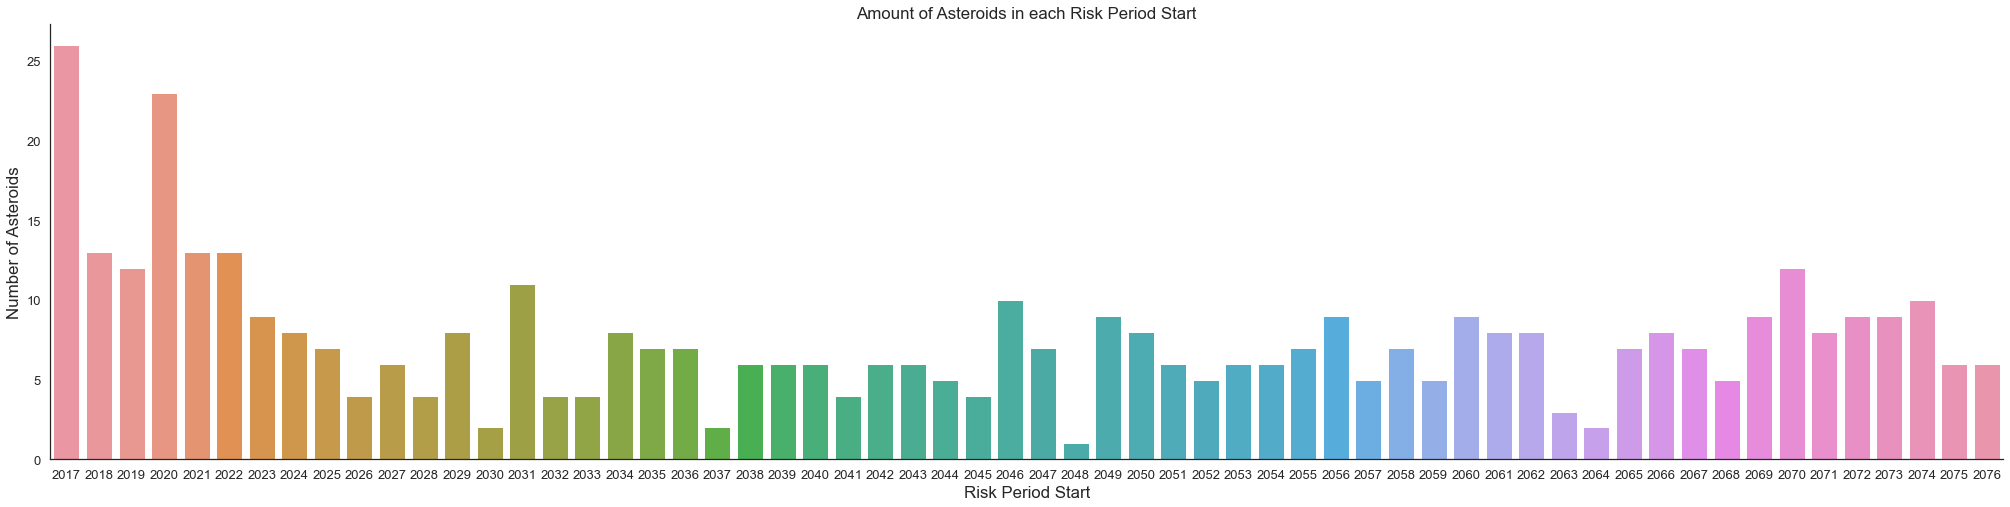

In [18]:
sns.set_theme(style="white",font_scale=1.4)
fig, x=plt.subplots(figsize=(35,8))
x = sns.countplot(x="Risk Period Start", data=df)
plt.title('Amount of Asteroids in each Risk Period Start')
x.set(ylabel='Number of Asteroids')
plt.tick_params(labelsize=13)
sns.despine()
plt.show()

### Comments
In this part , I have used the count plot to demonstrate a branch of my data. I can see that the data is scattered throughout the diagram with no certain relationship between the two inputs. The year 2017 showed the highest number of asteriods in the initial risk period. The lowest number of asteriods (less than 5) is seen at the year 2048. The graph then fluctuates throughout the years. 

## Plot 2 : Cumulative Probability vs Potential Impacts

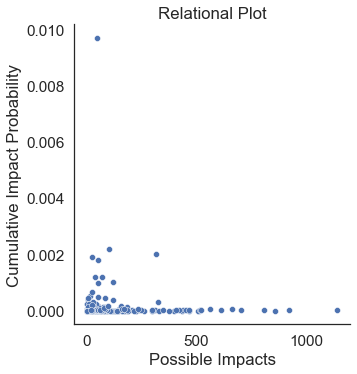

In [19]:
sns.set_theme(style="white",font_scale=1.4)
sns.relplot(data=df, x="Possible Impacts", y="Cumulative Impact Probability")
plt.title('Relational Plot')
sns.despine()
plt.show()

### Comments 
For this section , I have used the relational plot. This plot shows the direct correlation between the number of impacts and the probabilities of the impacts. The data reveals an outlier 
with the highest cumulative probability of impact at around 0.090. Morever, the data is scattered between the probabilties of 0 and 0.002. After , the data follows a linear line showing the greater the number of potential impacts , the same probability of an impact occuring. Overall , the data platues across the x axis.


## Plot 3 Asteriod Parameters


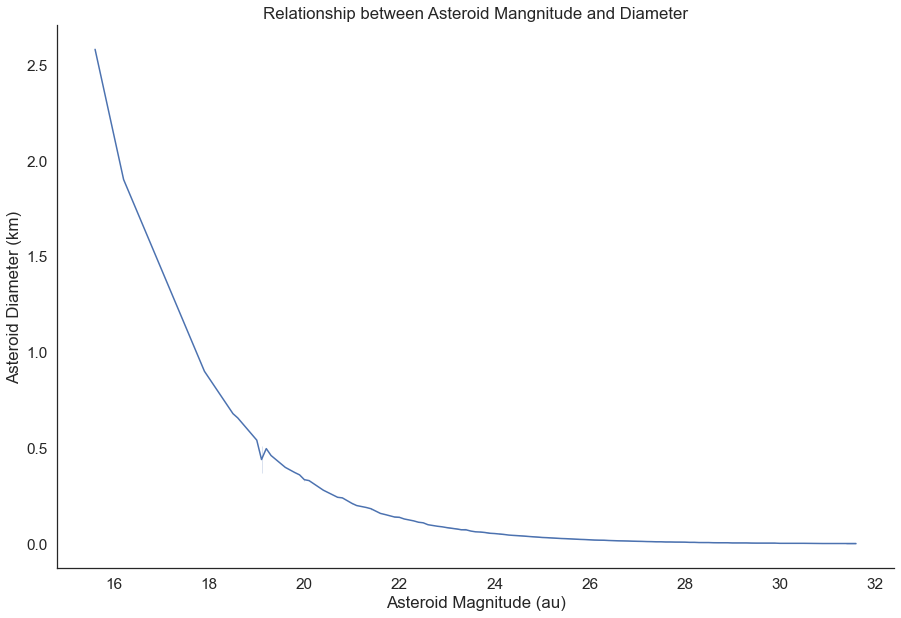

In [21]:
sns.set_theme(style="white",font_scale=1.4)
fig, x=plt.subplots(figsize=(15,10))
sns.lineplot(x="Asteroid Magnitude (au)", y="Asteroid Diameter (km)",  data=df, palette="rocket")
plt.title('Relationship between Asteroid Mangnitude and Diameter')
sns.despine()
plt.show()

### Comments 
In this plot , we can see the relationship between an asteriods diameter and magnitude. The higher the diamater the lower the magnitude of the asteriod. These parameters demonstrate and inverse relationship in our data. In other words , the wider the asteriod is in shape , the more visible and bright the asteriod is in relative to the earth. 